# BMW Sales Dataset (2010-2024) analysis with Pandas
We have a dataset of BMW sales for 14 years (50 000 rows), in this notebook I will represent huge and deep analysis. First of all we will prepare the data and the tools.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales = pd.read_csv('BMW sales data (2010-2024).csv')
sales.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


---
The dataset has no empty cells and has right dtypes, so we can start the analysis without data cleaning and trasforming.  
I will show following reports:  
1. Annual Sales Performance
2. Top Performing Models
3. Engine & Fuel Type Trend
4. Transimission Preference Report
5. Average Selling Price (ASP) Trend
6. Milleage vs Price Correlation
7. Depreciation Analysis by Model
8. Price vs Year
9. Price vs Engine size
10. Average price trend per year
11. Price Segmentation
---
## Annual Sales Performance
How have total sales (volume and revenue) changed year over year?  
Is the company growing and what is the trend?

In [4]:
sales.head()
annual_volume = sales.groupby('Year').Price_USD.sum().reset_index()
annual_volume = annual_volume.rename(columns={'Price_USD': 'Million_USD'})
annual_volume['Million_USD'] = round(annual_volume['Million_USD'] / 1_000_000,2)
annual_volume

,Year,Million_USD
0,2010,249.99
1,2011,246.81
2,2012,249.97
3,2013,247.91
4,2014,249.76
5,2015,248.66
6,2016,254.20
7,2017,247.32
8,2018,247.34
9,2019,255.06


<Axes: xlabel='Year', ylabel='Million USD'>

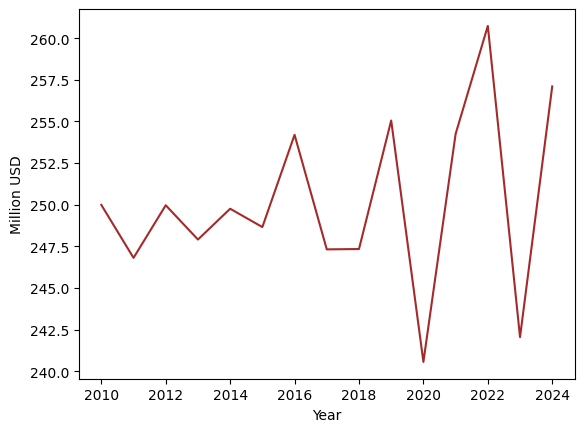

In [5]:
annual_volume.plot(
    x='Year', 
   # ylim=(220, 270), 
    color='brown',
    ylabel='Million USD',
    legend=False
)

### Conclusion
We see a **slowly growing trend**, but some years have bad results.  
**2020** and **2023** have almost 10 million less each.  
In **2020** we can associate the falling of revenue with *Covid*.  

---
## Top Performing Models
Which models are the best-sellers and generating the highest revenue for entire period.

In [6]:
bestsellers = sales.groupby('Model').agg({
    'Sales_Volume': 'count',
    'Price_USD': 'sum',
}).rename(columns={'Price_USD': 'Revenue'})
bestsellers.sort_values('Sales_Volume', ascending=False).reset_index()

,Model,Sales_Volume,Revenue
0,7 Series,4666,352610538
1,i3,4618,345427638
2,i8,4606,347137044
3,3 Series,4595,347226845
4,5 Series,4592,345721780
5,X1,4570,343948341
6,X3,4497,337349726
7,X5,4487,335215320
8,M5,4478,333498741
9,X6,4478,333318141


<Axes: xlabel='Model', ylabel='Sales Volume'>

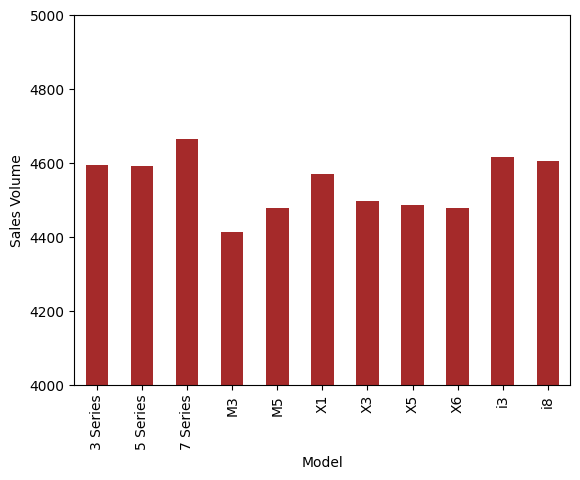

In [7]:
bestsellers.reset_index().plot.bar(
    x='Model', 
    y='Sales_Volume',
    ylim=(4000, 5000), 
    color='brown',
    ylabel='Sales Volume',
    legend=False
)

### Conclusion
The best seller is BMW 7 Series, and the least sold model is BMW M3.  
But otherwise the difference is only 200 cars.

---
## Engine & Fuel Type Trend
How has customer preference shifted between fuel types and engine sizes over the years.

<Axes: xlabel='Year', ylabel='Average engine size (L)'>

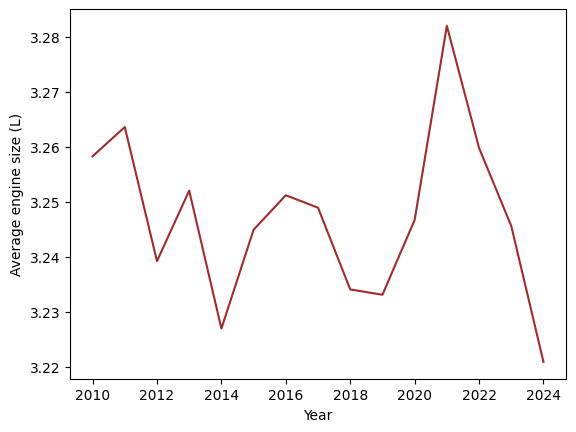

In [8]:
sales.groupby('Year').Engine_Size_L.mean().plot(
    color='brown',
    ylabel='Average engine size (L)'
)

In [9]:
fuel_trend = pd.crosstab(
    index=sales['Year'],
    columns=sales['Fuel_Type']
)
fuel_trend['Total'] = fuel_trend.sum(axis=1)
fuel_trend

Fuel_Type,Diesel,Electric,Hybrid,Petrol,Total
Year,,,,,
2010,829,837,826,838,3330
2011,791,841,837,809,3278
2012,791,825,880,836,3332
2013,815,821,843,847,3326
2014,867,810,868,805,3350
2015,803,826,869,860,3358
2016,842,849,814,860,3365
2017,801,822,822,845,3290
2018,801,859,803,815,3278


<Axes: xlabel='Year', ylabel='Cars sold'>

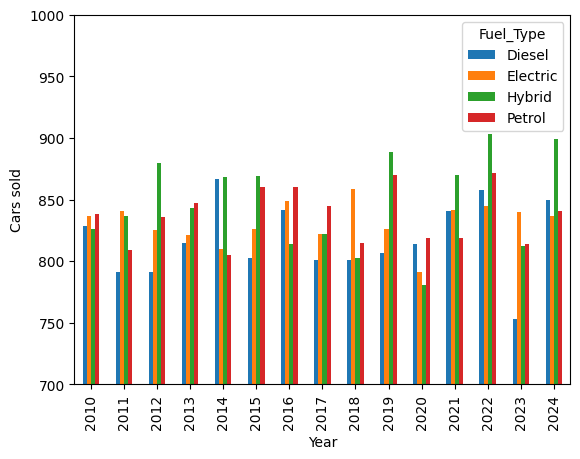

In [10]:
fuel_trend.plot.bar(
    y=['Diesel', 'Electric', 'Hybrid', 'Petrol'],
    ylim=(700, 1000),
    ylabel='Cars sold'
)

### Conclusion
We can see that people like cars with *big engine*, so all the time the average engine size is more than **3.0 l**.  
And also we see that in the last years the most popular fuel type is **Hybrid**.

---

## Transmission Preference Report
Checking if the market is shifting from Manual to Automatic transimission with years.

In [13]:
transmission_trend = pd.crosstab(
    index=sales['Year'],
    columns=sales['Transmission']
)
transmission_trend

Transmission,Automatic,Manual
Year,,
2010,1659,1671
2011,1659,1619
2012,1664,1668
2013,1639,1687
2014,1666,1684
2015,1699,1659
2016,1629,1736
2017,1649,1641
2018,1636,1642


<Axes: xlabel='Year', ylabel='Quantity sold'>

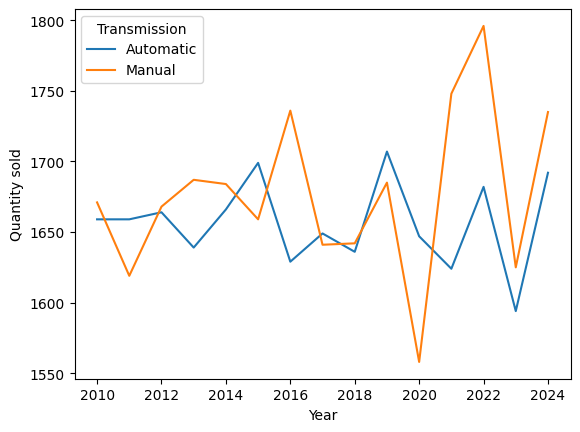

In [15]:
transmission_trend.plot(
    ylabel='Quantity sold'
)

### Conclusion
Surprisingly, even in recent years, **manual transmission** has been in the lead

---
## Average Selling Price (ASP) Trend
This report shows if is the average price of BMWs increasing over time, indicating a move upmarket.

<Axes: xlabel='Year', ylabel='Price USD'>

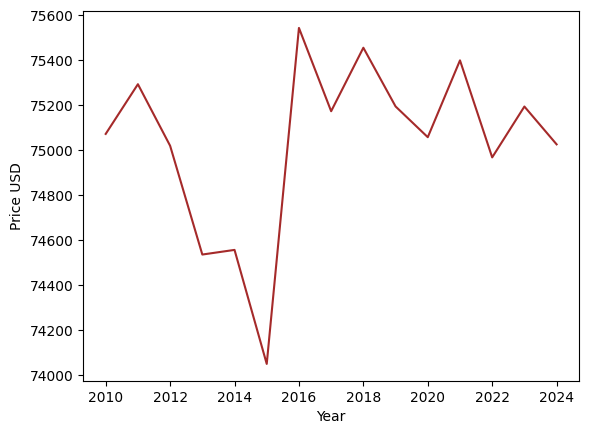

In [21]:
sales.groupby('Year').Price_USD.mean().plot(
    ylabel='Price USD',
    color='brown'
)

### Conclusion
The trend is not stable, we see **falling** between *2010* and *2015* and then **sharp rise** in price in *2016*.  
From *2016* to *2024* the average selling price is **slowly dropping**.  
**This graph looks very suspicious !**

---
## Mileage vs Price Correlation
Showing the relationship between car's mileage and its price.  
This simulates a used car valuation analysis.

In [39]:
mileage_check = sales.copy()
mileage_check['Mileage_Bin'] = pd.cut(mileage_check['Mileage_KM'], 50)
mileage_check.groupby('Mileage_Bin').Price_USD.agg(['mean', 'count', 'std'])

/var/folders/5r/k4s9_9s555s7j9np7w11x1n80000gn/T/ipykernel_22804/443238533.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_check.groupby('Mileage_Bin').Price_USD.agg(['mean', 'count', 'std'])


,mean,count,std
Mileage_Bin,,,
"(-196.993, 4002.86]",74861.122409,1013,25906.691287
"(4002.86, 8002.72]",73423.902270,1013,25571.503539
"(8002.72, 12002.58]",75811.946830,978,25601.758081
"(12002.58, 16002.44]",74623.442251,1013,26335.072519
"(16002.44, 20002.3]",74243.977800,991,26081.907672
"(20002.3, 24002.16]",74424.170780,1013,25970.558145
"(24002.16, 28002.02]",76922.541431,1062,25697.134649
"(28002.02, 32001.88]",74828.523760,968,25724.560214
"(32001.88, 36001.74]",75265.397030,1010,25843.582341


## Note
During the analysis I found the results too *strange*, **the averages are very equal** and **the std is unrealistic big**.  
I decided to check it deeper, because I started to think that the dataset is **fully made up**.

In [35]:
model_correlations = sales.groupby('Model').apply(
    lambda x: x['Mileage_KM'].corr(x['Price_USD'])
)
print("Correlation by Model:")
print(model_correlations.sort_values())

sales['Year_Group'] = pd.cut(sales['Year'], bins=[2010, 2015, 2020, 2025])
year_group_analysis = sales.groupby('Year_Group').apply(
    lambda x: x['Mileage_KM'].corr(x['Price_USD'])
)
print("\nCorrelation by Year Groups:")
print(year_group_analysis)

Correlation by Model:
Model
i8         -0.036607
7 Series   -0.023838
i3         -0.011006
X6         -0.009923
M5         -0.004830
X5         -0.000863
3 Series    0.000050
X3          0.001429
X1          0.007976
M3          0.011249
5 Series    0.020078
dtype: float64

Correlation by Year Groups:
Year_Group
(2010, 2015]    0.004958
(2015, 2020]    0.001430
(2020, 2025]   -0.021636
dtype: float64


/var/folders/5r/k4s9_9s555s7j9np7w11x1n80000gn/T/ipykernel_22804/2481946598.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  model_correlations = sales.groupby('Model').apply(
/var/folders/5r/k4s9_9s555s7j9np7w11x1n80000gn/T/ipykernel_22804/2481946598.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_group_analysis = sales.groupby('Year_Group').apply(
/var/folders/5r/k4s9_9s555s7j9np7w11x1n80000gn/T/ipykernel_22804/2481946598.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. 

In [41]:
print("Price ranges by model:")
for model in sales['Model'].unique():
    model_data = sales[sales['Model'] == model]
    print(f'{model:10} : ${model_data['Price_USD'].min():6,.0f} - ${model_data['Price_USD'].max():6,.0f} '
          f'(avg: ${model_data['Price_USD'].mean():,.0f})')

Price ranges by model:
5 Series   : $30,002 - $119,988 (avg: $75,288)
i8         : $30,000 - $119,998 (avg: $75,366)
X3         : $30,020 - $119,954 (avg: $75,017)
7 Series   : $30,021 - $119,978 (avg: $75,570)
M5         : $30,005 - $119,946 (avg: $74,475)
3 Series   : $30,008 - $119,994 (avg: $75,566)
X1         : $30,039 - $119,996 (avg: $75,262)
M3         : $30,037 - $119,960 (avg: $74,842)
X5         : $30,001 - $119,973 (avg: $74,708)
i3         : $30,020 - $119,965 (avg: $74,800)
X6         : $30,043 - $119,997 (avg: $74,435)


## Conclusion
Unfortunately, the dataset is **artificially made up**.  
We see **zero correlations** between *Mileage* and *Price*, it's impossible in real life.  
Also price ranges checking shows us that **the ranges are equal**.  

The analysis will have to end here, as there is no point in continuing.